<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Using-the-scripting-interface" data-toc-modified-id="Using-the-scripting-interface-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using the scripting interface</a></span></li><li><span><a href="#Using-the-funtion-library" data-toc-modified-id="Using-the-funtion-library-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using the funtion library</a></span></li></ul></div>


# How to compute acoustic Roughness
This tutorial explains how to use MOSQITO to compute the acoustic Roughness of a signal. Two approaches are possible: scripting interface and function library. Users who just need to compute SQ metrics should preferably use the scripting interface approach. The function library approach is dedicated to users who would like to integrate MOSQITO functions in another software for instance.

## Using the scripting interface

An Audio object is first created by importing an audio file. In this example, the signal is imported from a .wav file. The tutorial [Audio signal basic operations](./signal_basic_operations.ipynb) gives more information about the syntax of the import and the other supported file types. It also explains how to plot the time signal, compute and plot its 1/3 octave band spectrum, compute its overall level, etc.

For this tutorial, the test signal .wav file has been generated using the [signals_test_generation](../mosqito/tests/roughness/) script.
According to the roughness definition, an amplitude-modulated tone with a carrier frequency of 1 kHz and a modulation frequency of 70 Hz at a level of 60 dB should correspond to a roughness of 1 asper for a modulation depth of 1. 

In [8]:
# Add MOSQITO to the Python path
import sys
sys.path.append('..')

# Import MOSQITO color sheme [Optional]
from mosqito import COLORS

# Import Audio class
from mosqito.classes.Audio import Audio

# Create an Audio object
signal = Audio(
    "../mosqito/validations/roughness_danielweber/Sounds/Test_signal_fc1000_fmod70.wav")

Signal resampled to 48 kHz to allow calculation.


The acoustic Roughness is computed using the following command line. The function takes 1 input argument "overlap" that indicates the overlapping coefficient for the time windows of 200ms (default is 0.5).


The roughness is computed according to the Daniel and Weber method (see the corresponding [documentation](../documentation/roughness.md) for more information) 

In [10]:
signal.compute_roughness()

Roughness is being calculated


The preceeding command computes the roughness of the audio signal as a function of time. Its value can be plotted with the following command. The "time" argument indicates that the roughness should be plotted over time. The optional type_plot argument is used to specifies the plot type (among "curve", "bargraph", "barchart" and "quiver"). The optional color_list argument is used to specify the color scheme used for the plots.

d:\scripts\github_svn\scidatatool_martin\SciDataTool\Functions\Plot\plot_2D.py:359: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


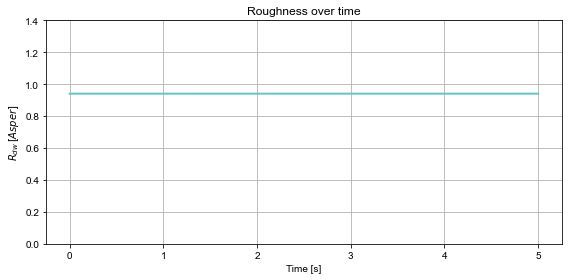

In [11]:
signal.roughness["Daniel Weber"].plot_2D_Data(
    "time",
    type_plot="curve",
    color_list=COLORS,
    y_min=0,
    y_max=1.4,
)

## Using the funtion library

The commands below shows how to compute the roughness of a time varying signal (same command line for a steady signal) by directly using the functions from MOSQITO. 

In [4]:
# Add MOSQITO to the Python path
import sys
sys.path.append('..')

# Import useful packages
import math
import numpy as np
import matplotlib.pyplot as plt

# Import MOSQITO modules
from mosqito.functions.shared.load import load
from mosqito.functions.roughness_danielweber.comp_roughness import comp_roughness

The signal is loaded using the "load" function which takes 3 parameters:
 - The signal type as a boolean: *True since the signal is stationary*
 - The path to the .wav signal file: *The file belongs to the "tests/roughness/data/Sounds" folder*
 - A calibration factor for the signal to be in Pa: *not needed here, use the default value=1*

Signal resampled to 48 kHz to allow calculation.


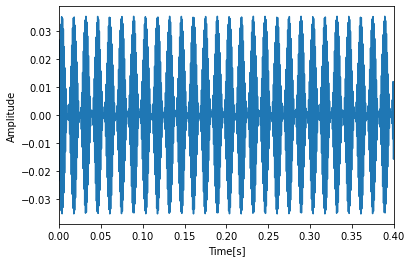

In [5]:
# Load signal and compute third-octave spectrum
signal, fs = load(True,'../mosqito/validations/roughness_danielweber/Sounds/Test_signal_fc1000_fmod70.wav') 

# Plot amplitude-modulated tone
time = np.linspace(0, len(signal)/fs, len(signal))
plt.plot(time, signal)
plt.xlim(0, 0.4) 
plt.xlabel("Time[s]")
plt.ylabel("Amplitude")
plt.show()

The function "comp_roughness" is then used with 3 parameters:
 - The signal values,
 - The sampling frequency,
 - An overlap proportion between 0 and 1.
 
The script calculates the roughness R in asper and also returns the time axis corresponding to the points of interests with the given overlapping proportion.

Roughness is being calculated


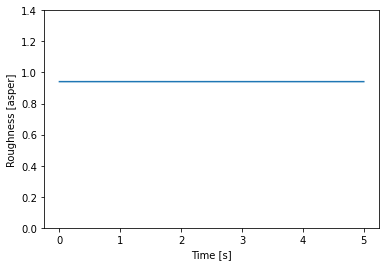

In [6]:
roughness = comp_roughness(signal, fs, overlap=0)

plt.plot(roughness['time'], roughness['values'])
plt.ylim(0, 1.4) 
plt.xlabel("Time [s]")
plt.ylabel("Roughness [asper]")
plt.show()